In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from repos_tools import read_chembl_screen_results, add_b3db_permeabilities
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preliminary SQLite operations

See the `notebook/2022-05-09-AD-drugs/target_{go.sql,protein_family}.sql` scripts, which produce `results/2022-05-09-AD-drugs/target-{go,pfam}.csv`, respectively.

## Importing and exploring data
### GO terms

In [2]:
fpath = '../../resources/UniProt/idmapping/HUMAN_9606_idmapping_selected.tab'
uniprot_map = pd.read_csv(fpath, sep='\t', usecols=[0, 1, 2], dtype='str', names=['uniprot_ac', 'uniprot_name', 'entrez_id'], index_col=0)
uniprot_map.head()

,uniprot_name,entrez_id
uniprot_ac,,
P31946,1433B_HUMAN,7529
P62258,1433E_HUMAN,7531
Q04917,1433F_HUMAN,7533
P61981,1433G_HUMAN,7532
P31947,1433S_HUMAN,2810


In [3]:
def reader(fpath, unimap=uniprot_map):
    df = pd.read_csv(fpath, index_col='uniprot_ac')
    df = pd.merge(unimap, df, on='uniprot_ac')
    df['uniprot_name'] = df.uniprot_name.str.replace('_HUMAN', '')
    return(df)

tgo = reader('../../results/2022-05-09-AD-drugs/target-go.csv')
tgo.tail()

,uniprot_name,entrez_id,description,cs_organism,go_id,parent_go_id,pref_name,class_level,aspect,path
uniprot_ac,,,,,,,,,,
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,GO:0005768,GO:0043226,endosome,2,C,cellular_component organelle endosome
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,GO:0016020,GO:0005575,membrane,1,C,cellular_component membrane
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,GO:0016021,GO:0005575,integral component of membrane,1,C,cellular_component integral component of memb...
Q16198,Q16198,NaN,EWS-Fli1 protein,Homo sapiens,GO:0003677,GO:0003676,DNA binding,2,F,molecular_function nucleic acid binding DNA ...
Q16198,Q16198,NaN,EWS-Fli1 protein,Homo sapiens,GO:0005634,GO:0043226,nucleus,2,C,cellular_component organelle nucleus


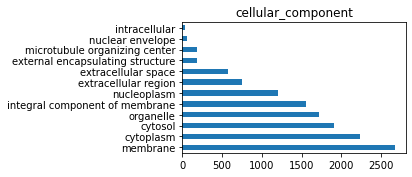

In [4]:
def go_barh(level, aspect='C', tgo=tgo):
    aspectd = {'C': 'cellular_component', 'F': 'molecular_function', 'P': 'biological_process'}
    b = (tgo.class_level == level) & (tgo.aspect == aspect)
    s = tgo.loc[b, 'pref_name'].value_counts()
    figsize = (4, len(s) / 5)
    fig, ax = plt.subplots(figsize=figsize)
    s.plot(kind='barh', ax=ax)
    ax.set_title(aspectd[aspect])
    return((fig, ax))

fig, ax = go_barh(level=1, aspect='C')

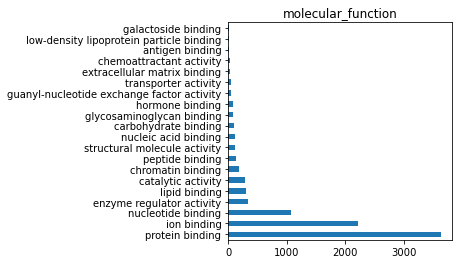

In [5]:
fig, ax = go_barh(level=1, aspect='F')

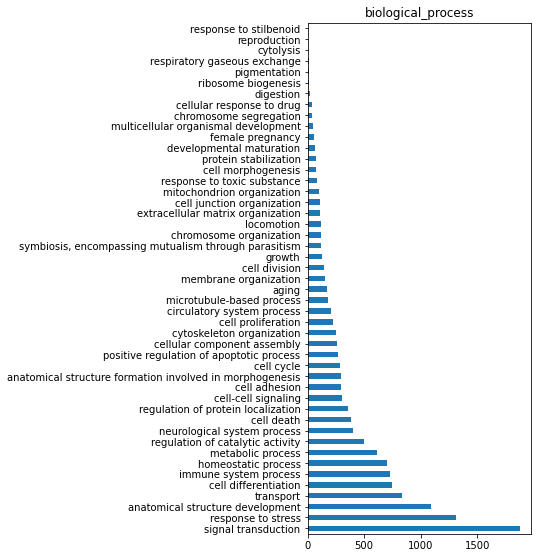

In [6]:
fig, ax = go_barh(level=1, aspect='P')

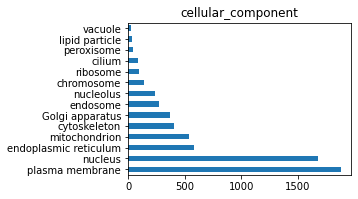

In [7]:
fig, ax = go_barh(level=2, aspect='C')

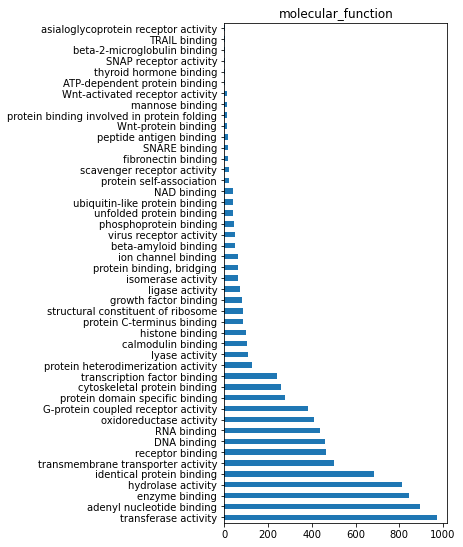

In [8]:
fig, ax = go_barh(level=2, aspect='F')

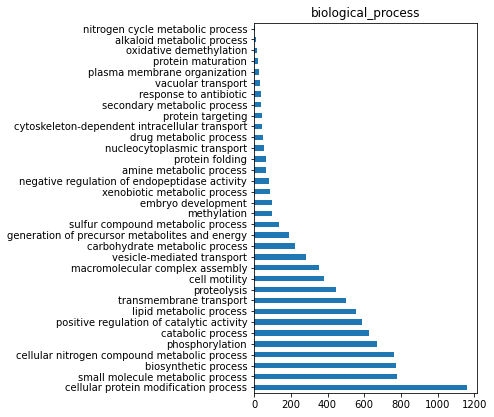

In [9]:
fig, ax = go_barh(level=2, aspect='P')

### Protein families

In [10]:
tpfam = reader('../../results/2022-05-09-AD-drugs/target-pfam.csv')
tpfam.tail()

,uniprot_name,entrez_id,description,cs_organism,protein_class_desc,pfam_level_1,pfam_level_2,pfam_level_3,pfam_level_4,pfam_level_5
uniprot_ac,,,,,,,,,,
Q2L8D9,Q2L8D9,NaN,Amyloid beta-binding alcohol dehydrogenase,Homo sapiens,unclassified,Unclassified protein,NaN,NaN,NaN,NaN
A1Z199,A1Z199,NaN,BCR/ABL p210 fusion protein,Homo sapiens,enzyme kinase protein kinase,Enzyme,Kinase,Protein Kinase,NaN,NaN
Q30155,Q30155,NaN,HLA-DRB2 protein,Homo sapiens,unclassified,Unclassified protein,NaN,NaN,NaN,NaN
Q16198,Q16198,NaN,EWS-Fli1 protein,Homo sapiens,unclassified,Unclassified protein,NaN,NaN,NaN,NaN
Q3B792,Q3B792,NaN,NQO1 protein,Homo sapiens,enzyme reductase,Enzyme,Oxidoreductase,NaN,NaN,NaN


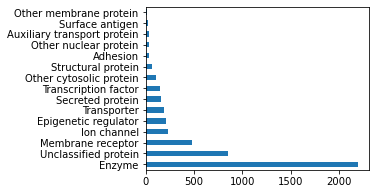

In [11]:
def pfam_barh(level, tpfam=tpfam):
    s = tpfam['pfam_level_' + str(level)].value_counts()
    figsize = (4, len(s) / 5)
    fig, ax = plt.subplots(figsize=figsize)
    tpfam['pfam_level_' + str(level)].value_counts().plot(kind='barh', ax=ax)
    return((fig, ax))

fig, ax = pfam_barh(level=1)

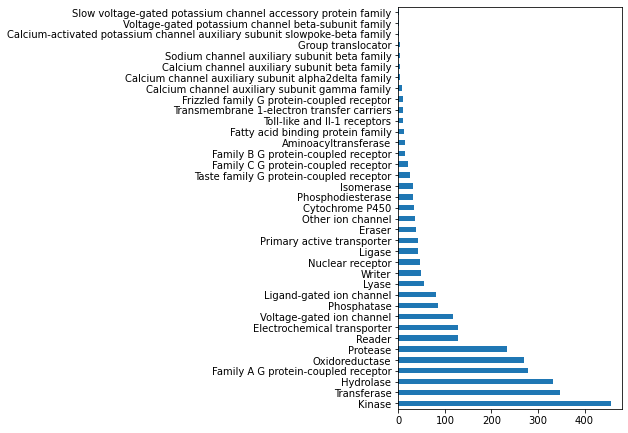

In [12]:
fig, ax = pfam_barh(level=2)

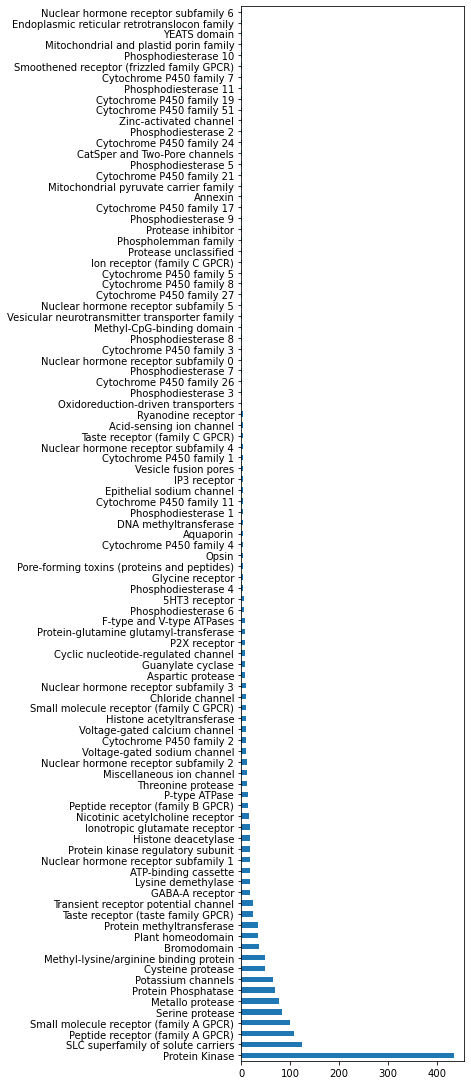

In [13]:
fig, ax = pfam_barh(level=3)

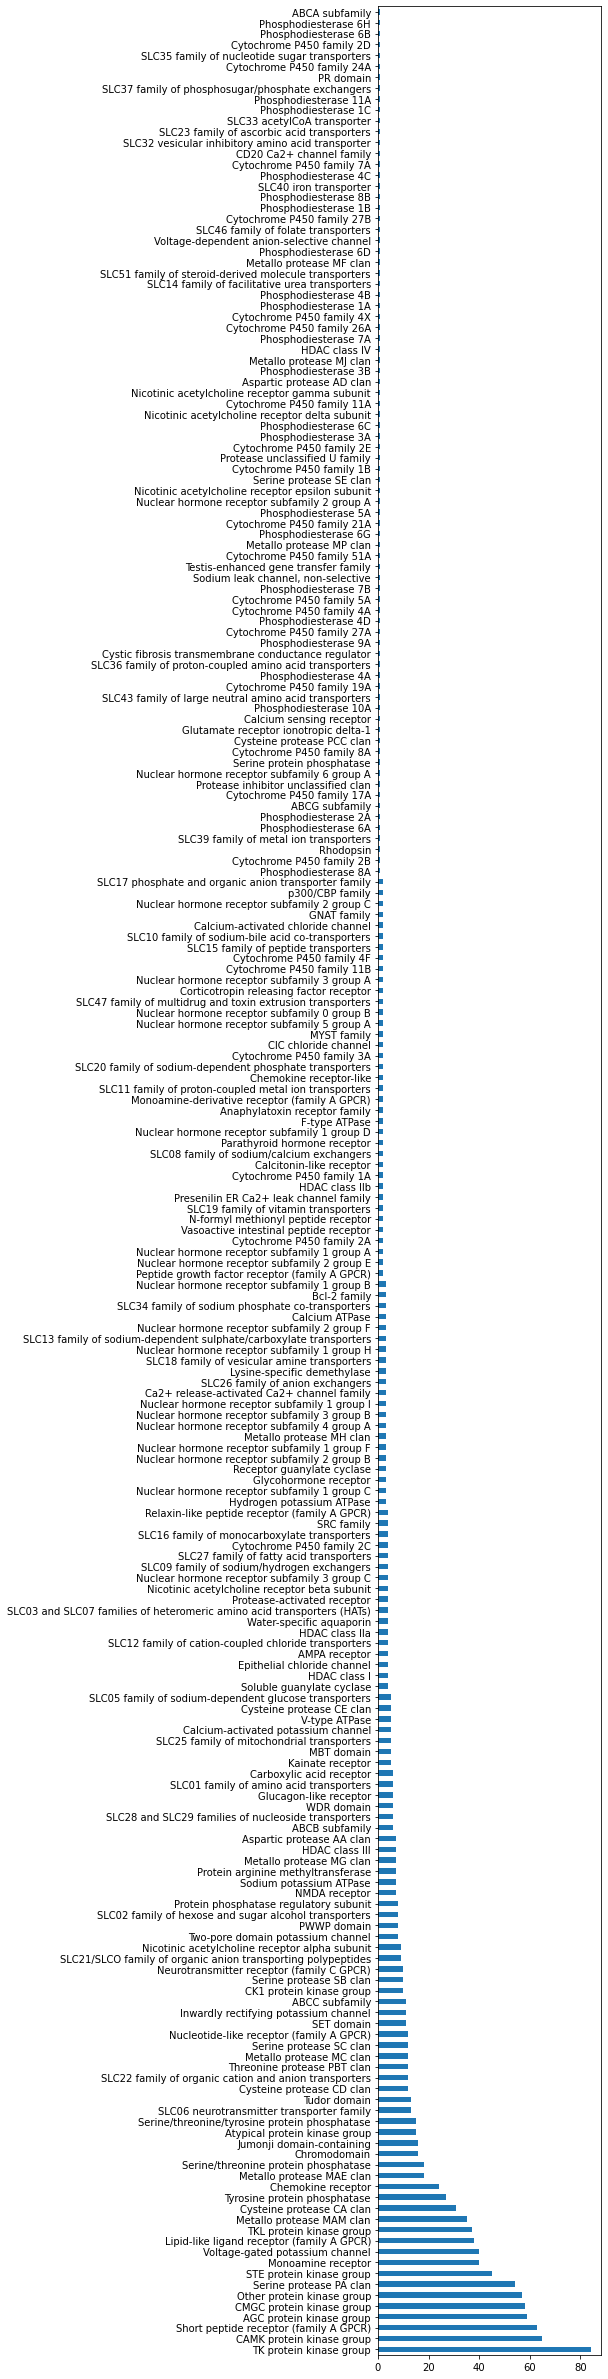

In [14]:
fig, ax = pfam_barh(level=4)

In [15]:
fpath = '../../results/2022-01-14-top-drugs/ranked-drugs-v2.csv'
ranked_drugs = pd.read_csv(fpath, index_col='drug_chembl_id')
ranked_drugs.head()

,drug_name,max_phase,indication_class,uniprot_name,target_name,standard_inchi,logBB,BBB+/BBB-,BBB confidence group,max_phase_for_AD,aggregate rank,knowledge,TWAS2+,agora2+,AD DE APOE3-APOE3,AD DE APOE4-APOE4,APOE3-4 DE neuron,APOE3-4 DE astrocyte,APOE3-4 DE microglia
drug_chembl_id,,,,,,,,,,,,,,,,,,,
CHEMBL477772,PAZOPANIB,4,NaN,BMR1B|PK3CD|PLK4|STK25|P3C2B|RIOK3|MP2K7|CHK1|...,Bone morphogenetic protein receptor type-1B|PI...,InChI=1S/C21H23N7O2S/c1-13-5-6-15(11-19(13)31(...,NaN,NaN,NaN,NaN,1.0,97,24,72,1187,25,18,1632,1833
CHEMBL491473,CEDIRANIB,3,NaN,CDC7|PK3CD|EF2K|PLK4|STK25|P3C2B|RIOK3|MP2K7|I...,Cell division cycle 7-related protein kinase|P...,InChI=1S/C25H27FN4O3/c1-16-12-17-19(29-16)6-7-...,NaN,NaN,NaN,NaN,2.0,106,41,52,1274,22,37,1164,2035
CHEMBL939,GEFITINIB,4,NaN,CDC7|EF2K|PLK4|STK25|P3C2B|CTRO|RIOK3|MP2K7|IK...,Cell division cycle 7-related protein kinase|S...,InChI=1S/C22H24ClFN4O3/c1-29-20-13-19-16(12-21...,-0.5,BBB+,A,NaN,3.0,66,18,90,959,11,83,1450,2026
CHEMBL446452,ARUNDINE,3,NaN,RGS4|GPR84,Regulator of G-protein signaling 4|G-protein c...,InChI=1S/C17H14N2/c1-3-7-16-14(5-1)12(10-18-16...,NaN,NaN,NaN,NaN,4.0,1323,816,18,14,14,5,1228,1196
CHEMBL296306,LACTULOSE,4,Laxative,RGS4,Regulator of G-protein signaling 4,InChI=1S/C12H22O11/c13-1-4-6(16)7(17)8(18)11(2...,NaN,NaN,NaN,NaN,5.0,1321,815,15,15,16,7,1227,1195


In [16]:
# drug-target network
fpath = '../../results/2021-10-24-chembl-query/chembl-avg_p_activities-phase_3_4-avg_p_act_5plus-v2.csv'
dtn = pd.read_csv(fpath, usecols=['drug_chembl_id', 'drug_name', 'target_uniprot_ac'])
dtn.head()

,drug_chembl_id,drug_name,target_uniprot_ac
0,CHEMBL1000,CETIRIZINE,P35367
1,CHEMBL1002,LEVOSALBUTAMOL,P07550
2,CHEMBL1002,LEVOSALBUTAMOL,P10635
3,CHEMBL1002,LEVOSALBUTAMOL,P16473
4,CHEMBL1002,LEVOSALBUTAMOL,P19838


In [17]:
%connect_info

{
  "shell_port": 49491,
  "iopub_port": 49492,
  "stdin_port": 49493,
  "control_port": 49495,
  "hb_port": 49494,
  "ip": "127.0.0.1",
  "key": "20945d39-3bf6fc04b854d3994c419ef2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-889607e3-b4dc-491d-a304-8f016c29d84d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
